Để tiến hành phân tích và xử lí dữ liệu để phân tích tương quan, phân tích nhóm, hồi quy và khai phá mô hình, chúng ta cần thực hiện các bước sau:

  Chuyển đổi kiểu dữ liệu:
    Chuyển đổi các cột thời gian (Occurred_On, Created_On, Informed_On, Last_Updated_On) sang định dạng datetime để có thể xử lí và tính toán theo thời gian.
    Chuyển đổi các cột có giá trị Yes/No (Has_Contractor_Notified_Schools, Has_Contractor_Notified_Parents, Have_You_Alerted_OPT) sang kiểu dữ liệu boolean (True/False) để thuận tiện trong phân tích.
    Xử lí và điền giá trị thiếu:
        Kiểm tra dữ liệu để xác định các giá trị thiếu (missing values) trong các cột.
        Điền giá trị thiếu bằng cách lựa chọn phương pháp thích hợp như điền giá trị trung bình, giá trị phổ biến, hoặc sử dụng các kỹ thuật xử lí dữ liệu khác.
  Tiến hành phân tích tương quan (Correlation Analysis):
        Sử dụng ma trận tương quan Pearson để đo độ tương quan giữa các biến dữ liệu.
        Tạo heatmap hoặc biểu đồ tương quan để trực quan hóa mức độ tương quan giữa các biến.
        Tiến hành phân tích nhóm (Cluster Analysis):
        Sử dụng thuật toán nhóm như K-means Clustering để phân loại các khu vực có xu hướng gặp vấn đề kẹt xe tương tự nhau.
        Lựa chọn các đặc trưng quan trọng (ví dụ: số lượng sự cố xe buýt, dân số, cơ sở hạ tầng giao thông) để phân loại.
  Tiến hành hồi quy (Regression Analysis):
        Sử dụng mô hình hồi quy tuyến tính đa biến (Multiple Linear Regression) để dự đoán tác động của các yếu tố khác nhau đối với vấn đề kẹt xe.
        Xác định mức độ ảnh hưởng của các biến độc lập (nguyên nhân gây sự cố, số lượng xe buýt, quận/huyện) đối với biến phụ thuộc (số lượng xe kẹt xe).
  Tiến hành khai phá mô hình (Model Mining):
        Sử dụng các thuật toán khai phá mô hình như Cây quyết định (Decision Trees) hoặc Mạng nơ-ron (Neural Networks)

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Datamining.csv')

# Chuyển đổi kiểu dữ liệu
data['Occurred_On'] = pd.to_datetime(data['Occurred_On'])
data['Created_On'] = pd.to_datetime(data['Created_On'])
data['Informed_On'] = pd.to_datetime(data['Informed_On'])
data['Last_Updated_On'] = pd.to_datetime(data['Last_Updated_On'])

data['Has_Contractor_Notified_Schools'] = data['Has_Contractor_Notified_Schools'].map({'Yes': True, 'No': False})
data['Has_Contractor_Notified_Parents'] = data['Has_Contractor_Notified_Parents'].map({'Yes': True, 'No': False})
data['Have_You_Alerted_OPT'] = data['Have_You_Alerted_OPT'].map({'Yes': True, 'No': False})

# Kiểm tra giá trị thiếu
missing_values = data.isnull().sum()
print(missing_values)

# Xử lý giá trị thiếu
data['Number_Of_Students_On_The_Bus'].fillna(data['Number_Of_Students_On_The_Bus'].mean(), inplace=True)

# Loại bỏ cột "Boro"
data = data.drop("Boro", axis=1)

correlation_matrix = data[['Route_Number', 'Number_Of_Students_On_The_Bus']].corr()
print(correlation_matrix)

# Phân tích nhóm
X = data[['Number_Of_Students_On_The_Bus', 'Occurred_On']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels

# Hồi quy
X = data[['Number_Of_Students_On_The_Bus', 'Occurred_On', 'Cluster']]
y = data['Breakdown_or_Running_Late']

# Mã hoá các giá trị chuỗi thành số
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mô hình Linear Regression
X = data[['Number_Of_Students_On_The_Bus', 'Occurred_On', 'Cluster']]
y = data['Breakdown_or_Running_Late']

# Mã hoá các giá trị chuỗi thành số
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mô hình Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print('Linear Regression MSE:', linear_reg_mse)



FileNotFoundError: [Errno 2] No such file or directory: 'Datamining.csv'

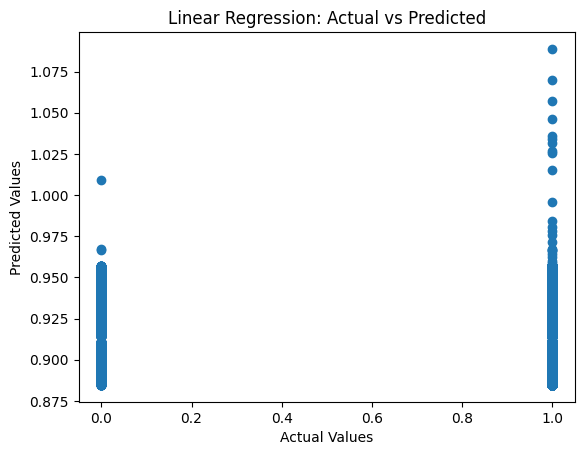

C:\Users\tranq\AppData\Local\Temp\ipykernel_26512\2842556957.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual Values', shade=True)
C:\Users\tranq\AppData\Local\Temp\ipykernel_26512\2842556957.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(linear_reg_predictions, label='Predicted Values', shade=True)


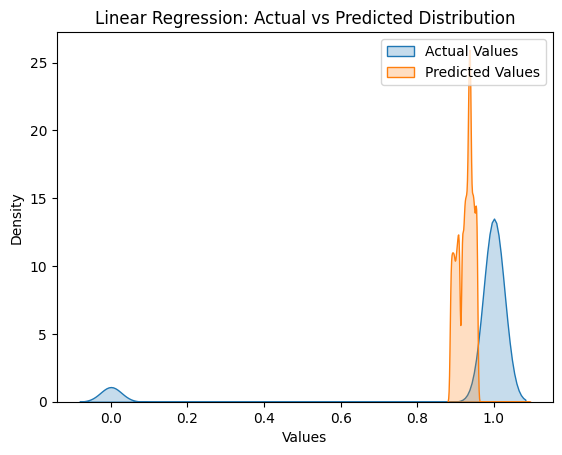

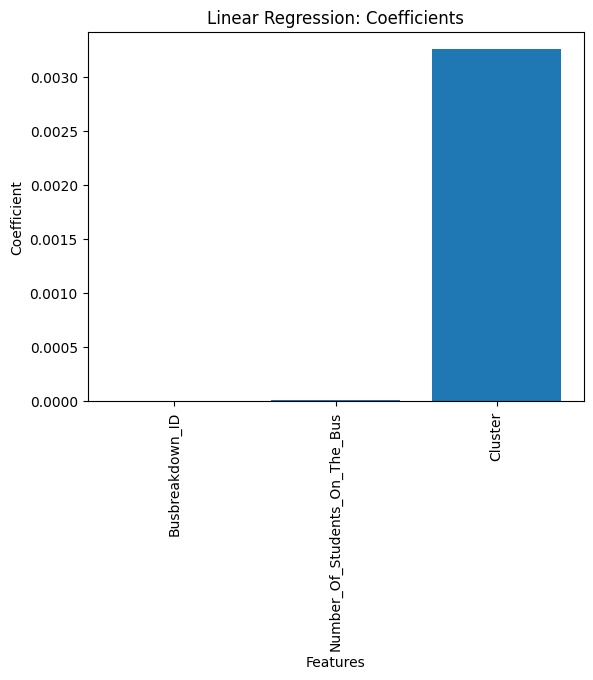

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ thể hiện kết quả dự đoán và kết quả thực tế
plt.scatter(y_test, linear_reg_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Biểu đồ thể hiện phân bố của kết quả dự đoán và kết quả thực tế
sns.kdeplot(y_test, label='Actual Values', shade=True)
sns.kdeplot(linear_reg_predictions, label='Predicted Values', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Linear Regression: Actual vs Predicted Distribution')
plt.legend()
plt.show()

# Biểu đồ thể hiện hệ số hồi quy
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': linear_reg.coef_})
plt.bar(coefficients['feature'], coefficients['coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Linear Regression: Coefficients')
plt.xticks(rotation=90)
plt.show()


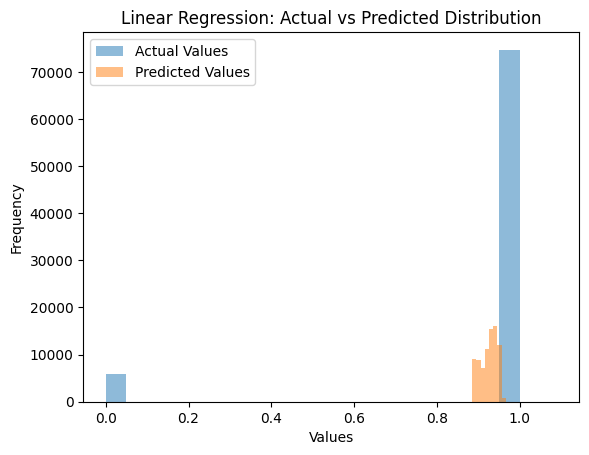

In [22]:
plt.hist(y_test, bins=20, alpha=0.5, label='Actual Values')
plt.hist(linear_reg_predictions, bins=20, alpha=0.5, label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Linear Regression: Actual vs Predicted Distribution')
plt.legend()
plt.show()


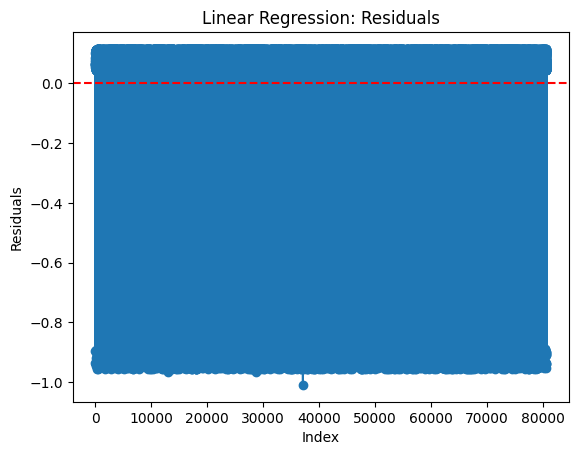

In [23]:
plt.plot(range(len(y_test)), y_test - linear_reg_predictions, marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')
plt.show()


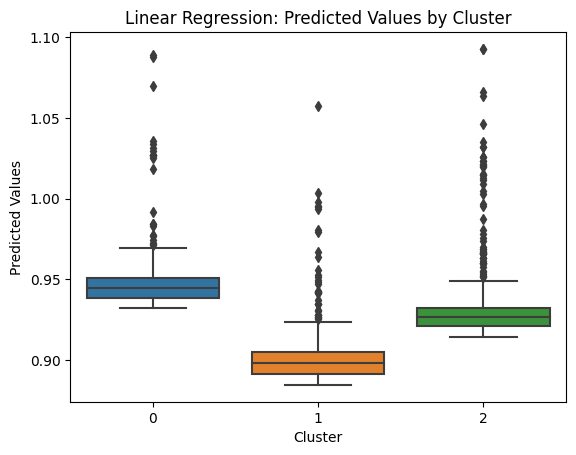

In [24]:
data['Predicted'] = linear_reg.predict(X)
sns.boxplot(x='Cluster', y='Predicted', data=data)
plt.xlabel('Cluster')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted Values by Cluster')
plt.show()
